In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow 

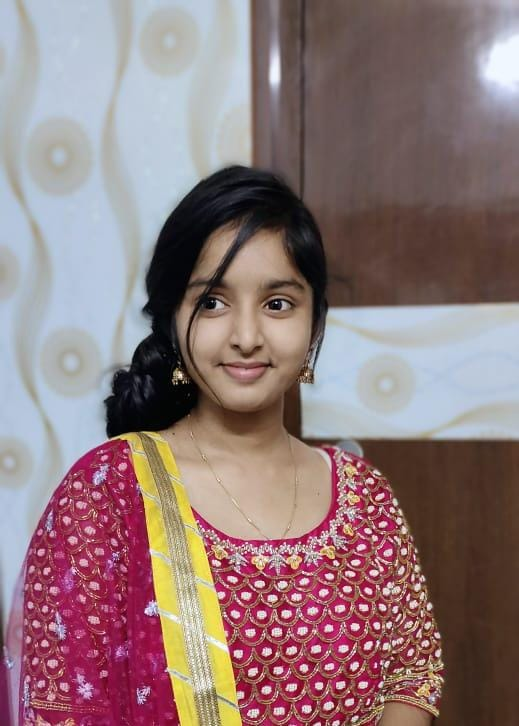

In [2]:
img=cv.imread("/content/drive/MyDrive/Divya-18121a0582/WhatsApp Image 2021-11-01 at 11.22.59 PM.jpeg")
cv2_imshow(img)

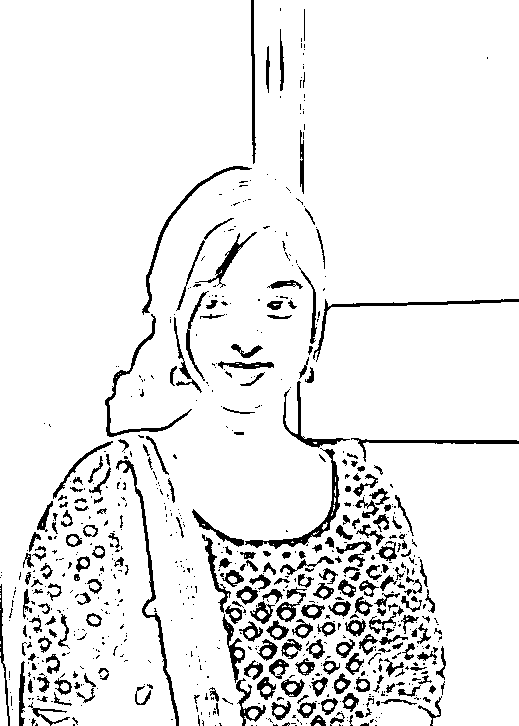

In [3]:
#creating edge mask
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur_value=7
line_size=7
gray_blur=cv.medianBlur(gray,blur_value)
edges=cv.adaptiveThreshold(gray_blur,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,line_size,blur_value)
cv2_imshow(edges)

In [4]:
#color quantization
total_color=9
k=total_color
#transform the image
data=np.float32(img).reshape((-1,3))
#determine criteria
criteria=(cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 0.001)


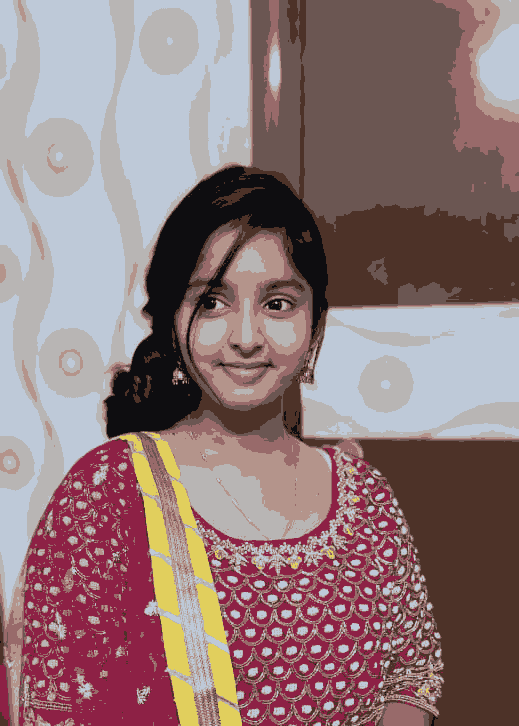

In [5]:
# Implementing K-Means
ret,label,center=cv.kmeans(data,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
result = center[label.flatten()]
result = result.reshape(img.shape)
cv2_imshow(result)

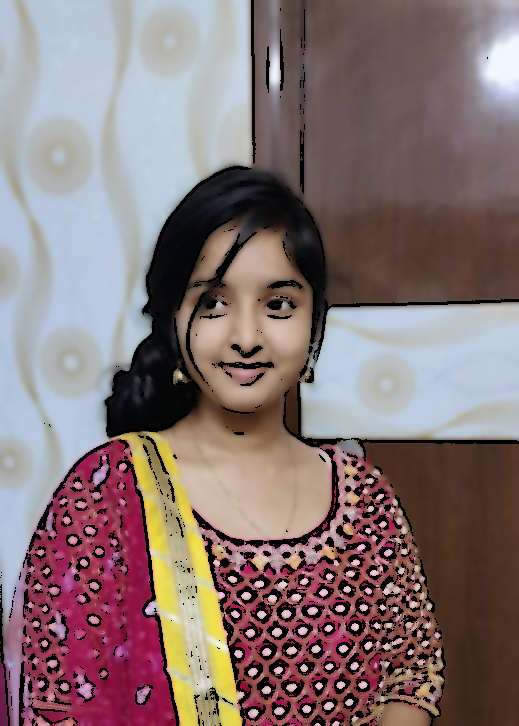

In [6]:
blurred = cv.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
cartoon = cv.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)